<a href="https://colab.research.google.com/github/ducsuibot/hiura-mihate/blob/main/Gradient%20descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [199]:
# Load our data set
#x_train = np.array([[2.1,3], [1.6,3]])   #features
#y_train = np.array([400.0, 330.0])   #target value

In [200]:
# Load the data from 'data.txt'
data = np.loadtxt('data.txt', delimiter=',')

In [201]:
# Chia cột 0 (diện tích) và cột 2 (giá) cho 1000
data[:, 0] = data[:, 0] / 1000  # diện tích nhỏ hơn
data[:, 2] = data[:, 2] / 1000  # giá nhà nhỏ hơn

In [202]:
# Extract features (diện tích, số phòng ngủ) and target (giá nhà)
x_train = data[:, :2]   # 2 cột đầu
y_train = data[:, 2]    # cột cuối

In [203]:
m = x_train.shape[0]
print(m)

47


In [204]:
# Hàm tính chi phí (cost function)
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        cost += (f_wb - y[i]) ** 2
    return cost / (2 * m)

In [205]:
# Hàm tính gradient
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
   # m=x.shape[0]
    #dj_dw = 0.0
    dj_db = 0.0

    for i in range(m):
        f_wb = np.dot(w, x[i]) + b
        err = f_wb - y[i]
        dj_dw += err * x[i]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


In [206]:
# Hàm gradient descent
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)

    J_history = []


    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if 1:
            J_history.append(cost_function(x, y, w , b))


        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db:.3e} ",
                  f"w: {w}, b: {b:.5e}")

    return w, b, J_history


In [207]:
# Khởi tạo tham số
w_init = np.zeros(x_train.shape[1])  # Vector 2 phần tử [0.0, 0.0]
b_init = 0.0

In [208]:
# Cấu hình gradient descent
iterations = 10000
alpha = 0.05

In [209]:
# Chạy gradient descent
w_final, b_final, J_hist= gradient_descent(
    x_train, y_train,
    w_init, b_init,
    alpha, iterations,
    compute_cost, compute_gradient
)

Iteration    0: Cost 6.62e+03  dj_dw: [ -764.20912819 -1120.36770213], dj_db: -3.404e+02  w: [38.21045641 56.01838511], b: 1.70206e+01
Iteration 1000: Cost 2.04e+03  dj_dw: [-0.001412    0.10842952], dj_db: -3.585e-01  w: [139.18200665  -6.53017702], b: 8.22983e+01
Iteration 2000: Cost 2.04e+03  dj_dw: [-0.00012112  0.00933326], dj_db: -3.086e-02  w: [139.2082077  -8.5479709], b: 8.89696e+01
Iteration 3000: Cost 2.04e+03  dj_dw: [-1.04259453e-05  8.03398653e-04], dj_db: -2.656e-03  w: [139.21046172  -8.72165994], b: 8.95438e+01
Iteration 4000: Cost 2.04e+03  dj_dw: [-8.97455655e-07  6.91558148e-05], dj_db: -2.286e-04  w: [139.21065574  -8.73661093], b: 8.95933e+01
Iteration 5000: Cost 2.04e+03  dj_dw: [-7.72522055e-08  5.95286867e-06], dj_db: -1.968e-05  w: [139.21067244  -8.7378979 ], b: 8.95975e+01
Iteration 6000: Cost 2.04e+03  dj_dw: [-6.64977886e-09  5.12417426e-07], dj_db: -1.694e-06  w: [139.21067388  -8.73800868], b: 8.95979e+01
Iteration 7000: Cost 2.04e+03  dj_dw: [-5.7236579

In [210]:
# In kết quả cuối cùng
print(f"\n(w,b) found by gradient descent: ({w_final}, {b_final:.4f})")


(w,b) found by gradient descent: ([139.21067402  -8.73801911], 89.5979)


In [211]:
# Dự đoán thử cho dòng đầu tiên
example = x_train[0]
prediction = np.dot(w_final, example) + b_final
print(f"Dự đoán giá nhà cho x = {example} : {prediction:.2f} USD (thực tế: {y_train[0]})")

Dự đoán giá nhà cho x = [2.104 3.   ] : 356.28 USD (thực tế: 399.9)


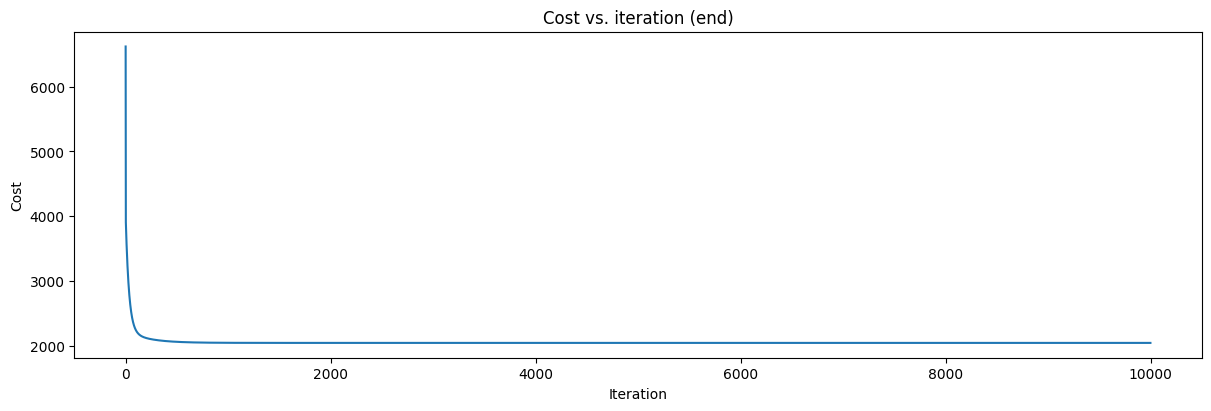

In [212]:
# Vẽ đồ thị cost theo số lần lặp
fig, ax2 = plt.subplots(constrained_layout=True, figsize=(12, 4))
ax2.plot(np.arange(len(J_hist)), J_hist)
ax2.set_title("Cost vs. iteration (end)")
ax2.set_ylabel('Cost')
ax2.set_xlabel('Iteration')
plt.show()